# Movie Embeddings

## training

shape (9724, 10)
max= 37.62185681748705
average= 0.10246586384721725
min= -11.437212790570591


(array([2.0000e+01, 1.1100e+02, 5.3700e+02, 5.0190e+03, 7.7450e+04,
        1.1507e+04, 1.4780e+03, 5.0800e+02, 2.7100e+02, 1.2200e+02,
        7.4000e+01, 4.8000e+01, 3.6000e+01, 2.1000e+01, 1.2000e+01,
        9.0000e+00, 9.0000e+00, 3.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([-11.43721279,  -8.98425931,  -6.53130583,  -4.07835235,
         -1.62539887,   0.82755461,   3.28050809,   5.73346157,
          8.18641505,  10.63936853,  13.09232201,  15.54527549,
         17.99822897,  20.45118245,  22.90413594,  25.35708942,
         27.8100429 ,  30.26299638,  32.71594986,  35.16890334,
         37.62185682]),
 <a list of 20 Patch objects>)

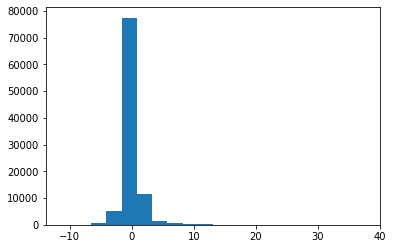

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from data import dataset

movie_embed_train = dataset.load_dense_array(file="../data/latent_tsvd_movie_train.npz")

print("shape", movie_embed_train.shape)
print("max=", np.max(movie_embed_train))
print("average=", np.mean(movie_embed_train))
print("min=", np.min(movie_embed_train))

plt.hist(x=movie_embed_train.flatten(), bins=20)

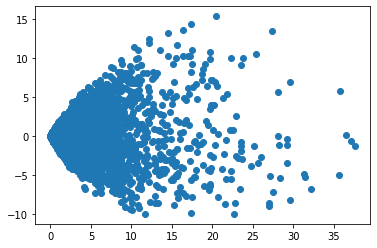

In [69]:
plt.scatter(x=movie_embed_train[:,0], y=movie_embed_train[:,1])

## validation

shape (9724, 10)
max= 16.897490931877
average= 0.041649970094843135
min= -7.091904735036976


(array([1.0000e+00, 2.3000e+01, 1.1600e+02, 7.3200e+02, 3.6800e+03,
        6.9749e+04, 1.8151e+04, 3.3560e+03, 8.4400e+02, 2.7600e+02,
        1.3000e+02, 6.6000e+01, 4.4000e+01, 3.0000e+01, 1.4000e+01,
        7.0000e+00, 6.0000e+00, 9.0000e+00, 4.0000e+00, 2.0000e+00]),
 array([-7.09190474, -5.89243495, -4.69296517, -3.49349538, -2.2940256 ,
        -1.09455582,  0.10491397,  1.30438375,  2.50385353,  3.70332332,
         4.9027931 ,  6.10226288,  7.30173267,  8.50120245,  9.70067223,
        10.90014202, 12.0996118 , 13.29908158, 14.49855137, 15.69802115,
        16.89749093]),
 <a list of 20 Patch objects>)

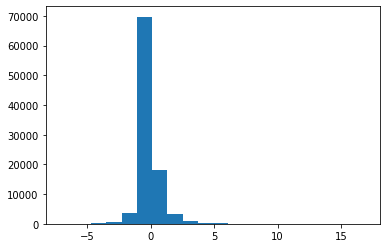

In [70]:
movie_embed_valid = dataset.load_dense_array(file="../data/latent_tsvd_movie_valid.npz")

print("shape", movie_embed_valid.shape)
print("max=", np.max(movie_embed_valid))
print("average=", np.mean(movie_embed_valid))
print("min=", np.min(movie_embed_valid))

plt.hist(x=movie_embed_valid.flatten(), bins=20)

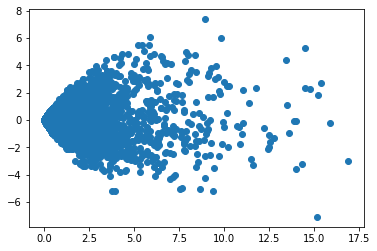

In [71]:
plt.scatter(x=movie_embed_valid[:,0], y=movie_embed_valid[:,1])

### Clusters

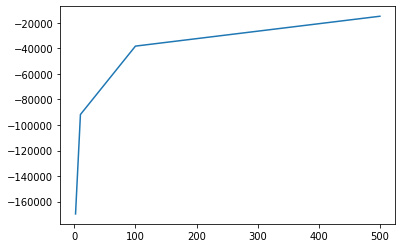

In [72]:
from sklearn.cluster import KMeans

candids_cluster_sizes = [2, 10, 100, 500]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=movie_embed_train)
    scores.append(kmeans_model.score(movie_embed_train))

plt.plot(candids_cluster_sizes, scores)


In [73]:
kmeans_model = KMeans(n_clusters=100, random_state=1).fit(X=movie_embed_train)
membership = kmeans_model.predict(X=movie_embed_train)

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(movie_embed_train[:1000, :])

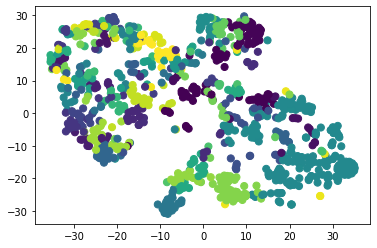

In [75]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership[:1000], s=50)

# User Embeddings

## training

shape (610, 20)
max= 92.48272519879829
average= 0.46585148703378615
min= -41.09818698357117


(array([5.000e+00, 1.100e+01, 2.400e+01, 3.800e+01, 2.110e+02, 2.663e+03,
        8.483e+03, 5.040e+02, 1.210e+02, 5.200e+01, 3.300e+01, 1.600e+01,
        2.100e+01, 3.000e+00, 8.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-41.09818698, -34.41914137, -27.74009577, -21.06105016,
        -14.38200455,  -7.70295894,  -1.02391333,   5.65513228,
         12.33417789,  19.0132235 ,  25.69226911,  32.37131472,
         39.05036033,  45.72940593,  52.40845154,  59.08749715,
         65.76654276,  72.44558837,  79.12463398,  85.80367959,
         92.4827252 ]),
 <a list of 20 Patch objects>)

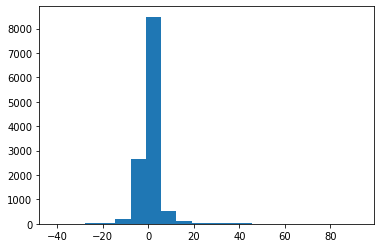

In [76]:
user_embed_train = dataset.load_dense_array(file="../data/latent_tsvd_user_train.npz")

print("shape", user_embed_train.shape)
print("max=", np.max(user_embed_train))
print("average=", np.mean(user_embed_train))
print("min=", np.min(user_embed_train))

plt.hist(x=user_embed_train.flatten(), bins=20)

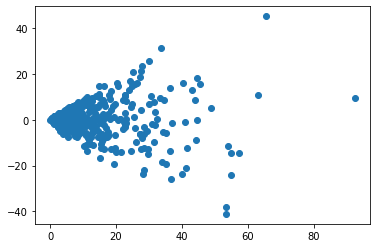

In [77]:
plt.scatter(x=user_embed_train[:,0], y=user_embed_train[:,1])

## Validation

shape (610, 20)
max= 36.24961103898045
average= 0.19555037423577226
min= -20.007086803927717


(array([1.000e+00, 2.000e+00, 0.000e+00, 7.000e+00, 2.000e+01, 1.670e+02,
        3.288e+03, 8.132e+03, 4.030e+02, 8.600e+01, 3.900e+01, 2.100e+01,
        1.600e+01, 8.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-20.0070868 , -17.19425191, -14.38141702, -11.56858213,
         -8.75574724,  -5.94291234,  -3.13007745,  -0.31724256,
          2.49559233,   5.30842723,   8.12126212,  10.93409701,
         13.7469319 ,  16.55976679,  19.37260169,  22.18543658,
         24.99827147,  27.81110636,  30.62394125,  33.43677615,
         36.24961104]),
 <a list of 20 Patch objects>)

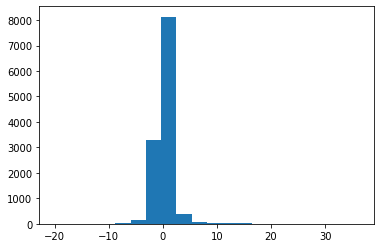

In [78]:
user_embed_valid = dataset.load_dense_array(file="../data/latent_tsvd_user_valid.npz")

print("shape", user_embed_valid.shape)
print("max=", np.max(user_embed_valid))
print("average=", np.mean(user_embed_valid))
print("min=", np.min(user_embed_valid))

plt.hist(x=user_embed_valid.flatten(), bins=20)

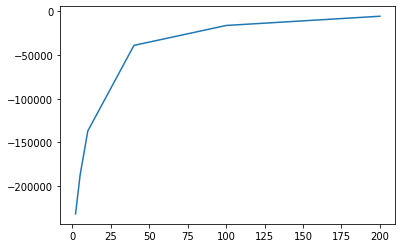

In [79]:
candids_cluster_sizes = [2, 5, 10, 40, 100, 200]
scores = list()
for k in candids_cluster_sizes:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X=user_embed_train)
    scores.append(kmeans_model.score(user_embed_train))

plt.plot(candids_cluster_sizes, scores)


In [84]:
kmeans_model = KMeans(n_clusters=50, random_state=1).fit(X=user_embed_train)
membership = kmeans_model.predict(X=user_embed_train)

In [85]:
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(user_embed_train)

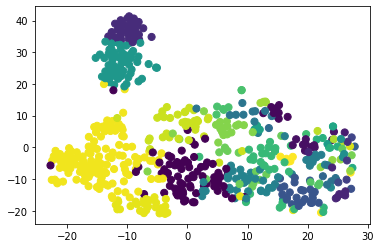

In [86]:
plt.scatter(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], c=membership, s=50)

# Feature quality

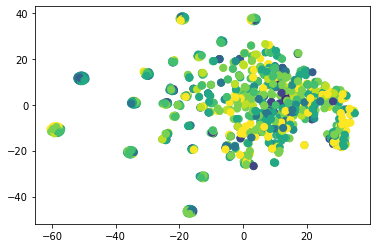

In [88]:
from data import dataset

um = dataset.load_sparse_matrix(file="../data/raw_ratings_train.npz")
pairwise_embed = np.concatenate((user_embed_train[um.row], movie_embed_train[um.col]), axis=1)

tsne = TSNE(n_components=2)
tsne_train_x = tsne.fit_transform(pairwise_embed[:1000, :])

plt.scatter(x=tsne_train_x[:,0], y=tsne_train_x[:,1], c=um.data[:1000], vmin=0, vmax=5, s=50)